In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

#### Load the training and testing data from the pre-made dataset by keras

In [44]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [45]:
# print out what the data looks like
print("Shapes of the data\nX_train: {}\nY_train: {}\n\nX_test: {}\nY_test: {} ".format(train_X.shape,train_y.shape,
                                                                                     test_X.shape, test_y.shape))

Shapes of the data
X_train: (60000, 28, 28)
Y_train: (60000,)

X_test: (10000, 28, 28)
Y_test: (10000,) 


5


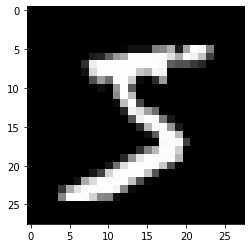

In [46]:
#what does each piece of data look like? 
plt.imshow(train_X[0], cmap = 'gist_gray')

#print "answer" for this piece
print(train_y[0])

X is used to denote the 28x28 matrix data that represents a handwritten digit
y is the correct "answer" for each corresponding X

train_X, and train_y will be used to train the model by giving the network the question(X) and solutions(y)

test_X, and test_y will be used to evalue the model

In [47]:
#normalize the values of x and y so they are between 0 and 1, this is important for neural network based models
train_X = train_X/255
test_X = test_X/255

In [48]:
# build a sequential neural network 
model = keras.Sequential([
    layers.Flatten(input_shape = (28, 28)), # use each pixel as an input
    layers.Dense(128, activation = 'relu'), 
    layers.Dense(10) # output a probability vector for the 10 different possible digits
])

In [49]:
#compile the model with built in optimizer "adam" and appropriate loss function
model.compile(optimizer = 'adam', loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
             metrics = ['accuracy'])

In [50]:
#train model
model.fit(train_X, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2598 - accuracy: 0.9266
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1163 - accuracy: 0.9656
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0800 - accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0603 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0468 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0365 - accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0292 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0238 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0196 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.016

In [51]:
# test the model on the testing data
test_loss, test_acc = model.evaluate(test_X, test_y, verbose = 2)
print("\nTest accuracy: {}%".format(100*round(test_acc, 4)))

313/313 - 0s - loss: 0.0758 - accuracy: 0.9793 - 317ms/epoch - 1ms/step

Test accuracy: 97.92999999999999%


In [25]:
#for further predictions, convert output to a probability model 
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
prediction = probability_model.predict(test_X)

313/313 [==============================] - 0s 742us/step


Model prediction for item 1 in the test_data: [7]


Actual Result:


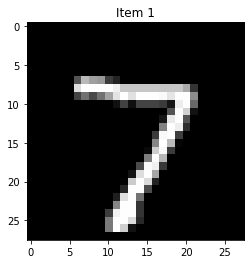

In [29]:
# check to see how the predictions worked
predicted = np.where(prediction[0] == max(prediction[0]))[0] # take the max probability of the prediction vector
print("Model prediction for item 1 in the test_data: {}".format(predicted))

print("\n\nActual Result:")
plt.imshow(test_X[0], cmap = 'gist_gray')
plt.title("Item 1")
plt.show()

### How does the same model run on compressed data?
Here, we will compress the data and run the same model to test the difference in performance

Text(0.5, 1.0, 'Original')

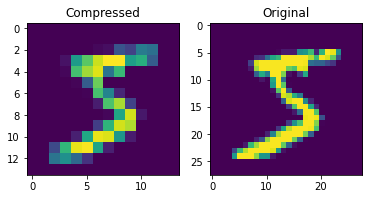

In [30]:
#reducing size:
def reduce(x):
    """
    Takes a 28 by 28 image and converts it to 14 by 14
    
    """
    avg = []
    for i in range(int(len(x)/2)):
        for j in range(int(len(x)/2)):
            avg.append((int(x[i*2][j*2]) + int(x[i*2][(j*2)+1]) + int(x[(i*2)+1][j*2]) + int(x[(i*2)+1][(j*2)+1])))
    return np.array(avg).reshape(14, 14)

# how does the reduced look compared to the original?
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(reduce(train_X[0]))
ax1.set_title("Compressed")
ax2.imshow(train_X[0])
ax2.set_title("Original")

In [38]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
reduced_train_X = np.array([reduce(i) for i in train_X])
reduced_test_X = np.array([reduce(i) for i in test_X])
#train_y and test_y stay the same

In [39]:
#now divide by 255*4 since the pixels were grouped into fours
reduced_train_X = reduced_train_X/(255*4)
reduced_test_X = reduced_test_X/(255*4)

In [40]:
#build the same network to classify digits
compressed_model = keras.Sequential([
    layers.Flatten(input_shape = (14, 14)), # now the input is 14x14
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10) #output vector stays the same
])

In [41]:
#same compiling setup
compressed_model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [42]:
# training compressed model
compressed_model.fit(reduced_train_X, train_y, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 902us/step - loss: 0.3678 - accuracy: 0.8999
Epoch 2/10
1875/1875 [==============================] - 2s 881us/step - loss: 0.1837 - accuracy: 0.9467
Epoch 3/10
1875/1875 [==============================] - 2s 896us/step - loss: 0.1345 - accuracy: 0.9605
Epoch 4/10
1875/1875 [==============================] - 2s 921us/step - loss: 0.1053 - accuracy: 0.9696
Epoch 5/10
1875/1875 [==============================] - 2s 926us/step - loss: 0.0868 - accuracy: 0.9744
Epoch 6/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.0742 - accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 2s 905us/step - loss: 0.0643 - accuracy: 0.9804
Epoch 8/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.0571 - accuracy: 0.9828
Epoch 9/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.0504 - accuracy: 0.9846
Epoch 10/10
1875/1875 [==============================] - 2s 938u

In [43]:
# test the accuracy
test_loss, test_acc = compressed_model.evaluate(reduced_test_X, test_y, verbose = 2)
print("\nTest accuracy: {}%".format(100*round(test_acc, 4)))

313/313 - 0s - loss: 0.0701 - accuracy: 0.9780 - 274ms/epoch - 877us/step

Test accuracy: 97.8%


In [59]:
#compare the network sizes

#original
original = 28 * 28 * 128 + 128 + 128 * 10 + 10

#compressed
compressed = 14 * 14 * 128 + 128 + 128 * 10 + 10

print("Total Trainable Parameters\n")
print("Original: {}\nCompressed: {}".format(original, compressed))
print("Compressed is {} times smaller than the original".format(round(original/compressed, 2)))

Total Trainable Parameters

Original: 101770
Compressed: 26506
Compressed is 3.84 times smaller than the original
